In [18]:
#R script to visualize results from BIMAS project 
#by Hope Townsend and Kaylee Rosenberger 
library(ggplot2)
library(dplyr)
library(gridExtra)
library(grid)
theme_set(theme_bw())
library(reshape2)

In [118]:
# set working directory
dir <- "/Users/hopekirby/Desktop/Courses/"
#import data
dat = read.csv(paste0(dir, "final_model experiment-spreadsheet.csv"))
dat[1:15,]

,BehaviorSpace.results..NetLogo.6.3.0.,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,⋯,X.2090,X.2091,X.2092,X.2093,X.2094,X.2095,X.2096,X.2097,X.2098,X.2099
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,final_model.nlogo,,,,,,,,,,⋯,,,,,,,,,,
2,experiment,,,,,,,,,,⋯,,,,,,,,,,
3,05/08/2023 12:04:07:999 -0600,,,,,,,,,,⋯,,,,,,,,,,
4,min-pxcor,max-pxcor,min-pycor,max-pycor,,,,,,,⋯,,,,,,,,,,
5,-20,20,-20,20,,,,,,,⋯,,,,,,,,,,
6,[run number],1,1,2,2,3,3,4,4,5,⋯,1046,1046,1047,1047,1048,1048,1049,1049,1050,1050
7,num_vectors,1,,1,,1,,1,,1,⋯,15,,15,,15,,15,,15,
8,number-of-nodes,70,,70,,70,,70,,70,⋯,70,,70,,70,,70,,70,
9,average-node-degree,0,,0,,0,,0,,0,⋯,20,,20,,20,,20,,20,


In [107]:
#row 17 contains # individuals dead / resistant (dead in even cols and resistant in odd)
#num_vectors = row 7 
#avg_node_degree = row 9
#resistance_decay_chance = row 12 
##################################################################
#Data processing 

#just saving the # of dead individuals -- other info is redundant since they are either dead or alive and we know the total 
col_even = seq_len(ncol(dat)) %% 2              # Create row indicator
dat_dead = dat[, col_even == 0]            # Subset even rows
dat_dead = as.data.frame(dat_dead)

#Create a new dataframe for easier plotting
sim = seq(1, 1050, 1)
num_dead = as.vector(as.numeric(dat_dead[17,]))
num_vectors = as.vector(as.numeric(dat_dead[7,]))
avg_node_degree = as.vector(as.numeric(dat_dead[9,]))
resistance_decay_chance = as.vector(as.numeric(dat_dead[12,]))

data_processed = data.frame(sim = sim, num_dead = num_dead, num_vectors = num_vectors, avg_node_degree = avg_node_degree, res_decay_chance = resistance_decay_chance)
head(data_processed)

,sim,num_dead,num_vectors,avg_node_degree,res_decay_chance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,70,1,0,0
2,2,70,1,0,0
3,3,70,1,0,0
4,4,70,1,0,0
5,5,70,1,0,0
6,6,70,1,0,5


### Impact of number of vectors on peristance

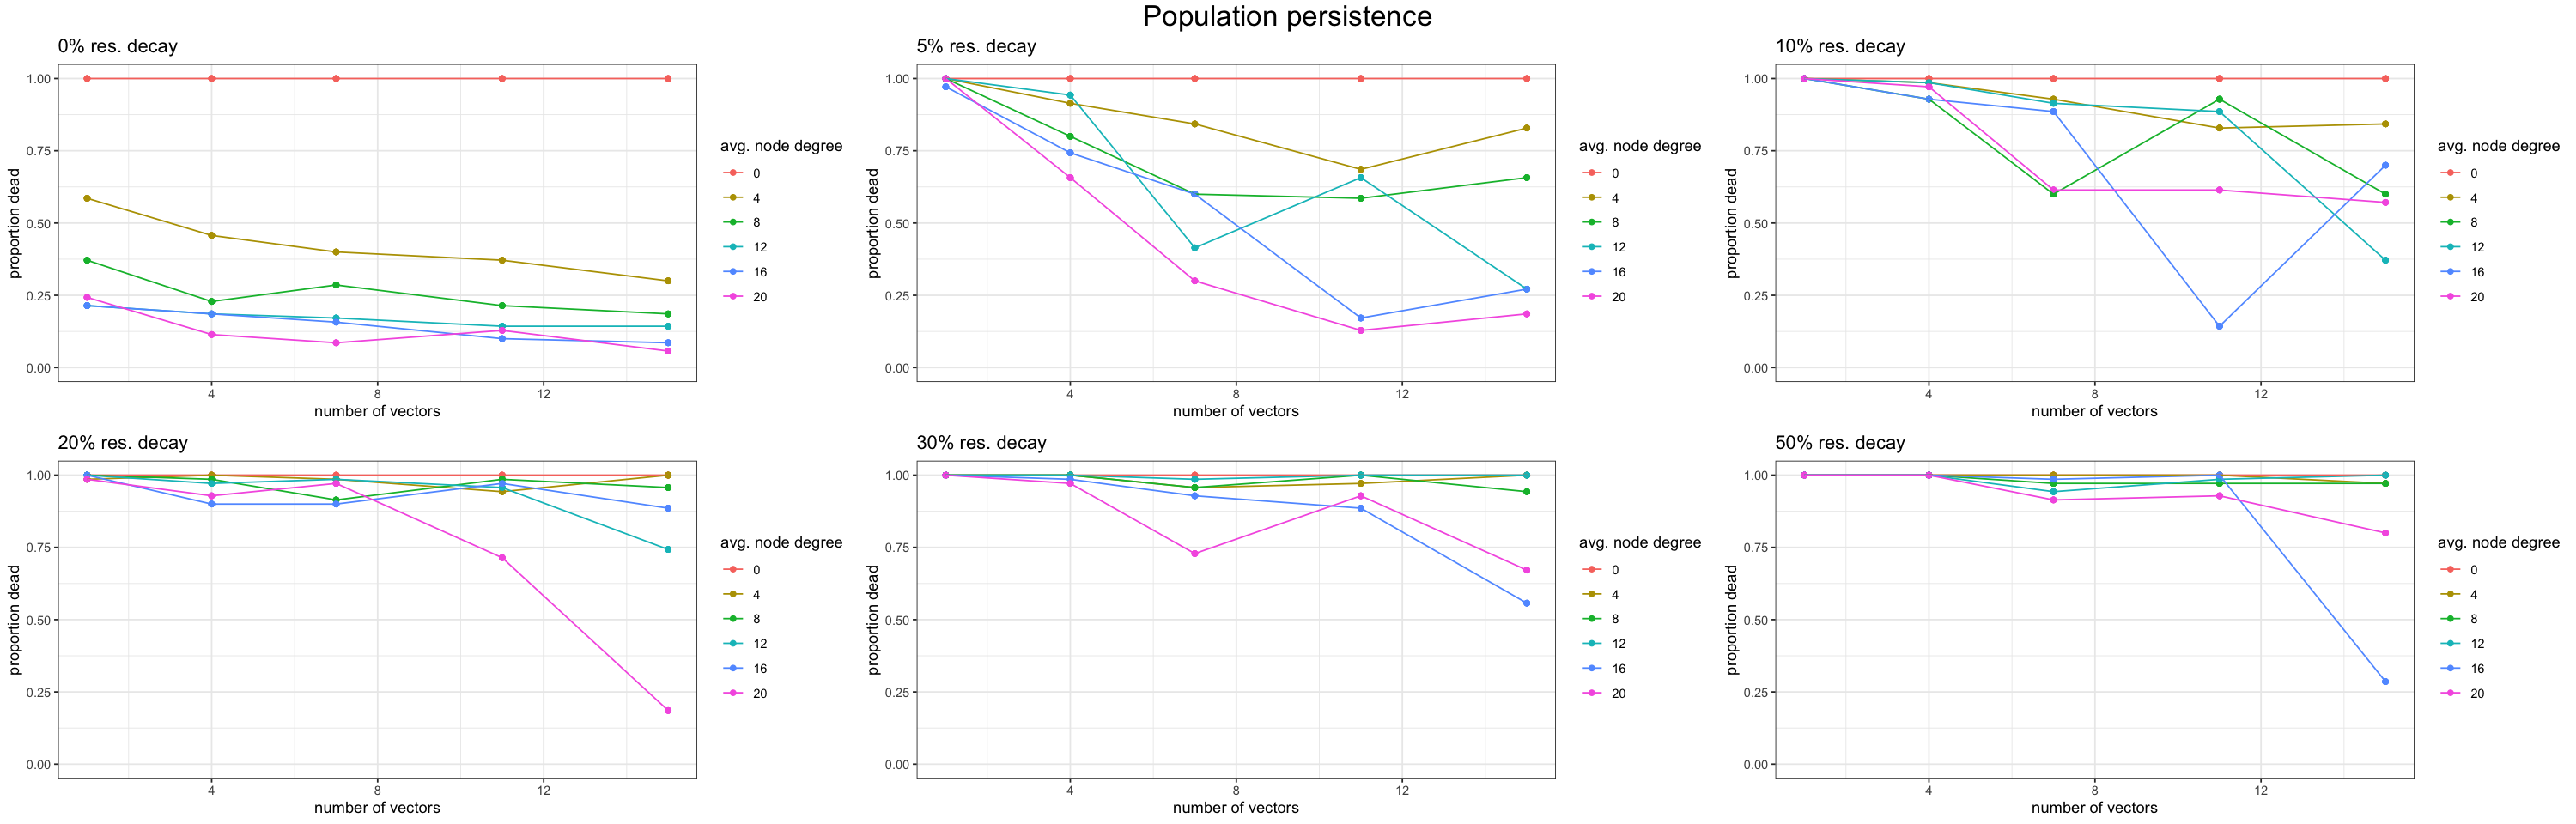

In [10]:

#have to keep some variables constant to determine the relationships
#Each plot below shows the results faceted by avg. node degree
#and the separate plots show results for different resistance decay chances
p1 = data_processed %>% filter(res_decay_chance == 0) %>%
  ggplot() +
    geom_point(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
    geom_line(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
    ylim(0,1) +
    ggtitle("0% res. decay") +
    ylab("proportion dead") +
    xlab("number of vectors") +
    guides(color=guide_legend(title="avg. node degree"))
#facet_wrap(vars(avg_node_degree)) + 

p2 = data_processed %>% filter(res_decay_chance == 5) %>%
  ggplot() +
  geom_point(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  geom_line(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  ylim(0,1) +
  ggtitle("5% res. decay") +
  ylab("proportion dead") +
  xlab("number of vectors") +
  guides(color=guide_legend(title="avg. node degree"))

p3 = data_processed %>% filter(res_decay_chance == 10) %>%
  ggplot() +
  geom_point(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  geom_line(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  ylim(0,1) +
  ggtitle("10% res. decay") +
  ylab("proportion dead") +
  xlab("number of vectors") +
  guides(color=guide_legend(title="avg. node degree"))

p4 = data_processed %>% filter(res_decay_chance == 20) %>%
  ggplot() +
  geom_point(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  geom_line(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  ylim(0,1) +
  ggtitle("20% res. decay") +
  ylab("proportion dead") +
  xlab("number of vectors") +
  guides(color=guide_legend(title="avg. node degree"))

p5 = data_processed %>% filter(res_decay_chance == 30) %>%
  ggplot() +
  geom_point(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  geom_line(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  ylim(0,1) +
  ggtitle("30% res. decay") +
  ylab("proportion dead") +
  xlab("number of vectors") +
  guides(color=guide_legend(title="avg. node degree"))

p6 =data_processed %>% filter(res_decay_chance == 50) %>%
  ggplot() +
  geom_point(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  geom_line(aes(x=num_vectors, y=(num_dead/70), color=as.factor(avg_node_degree))) +
  ylim(0,1) +
  ggtitle("50% res. decay") +
  ylab("proportion dead") +
  xlab("number of vectors") +
  guides(color=guide_legend(title="avg. node degree"))
options(repr.plot.height = 8, repr.plot.width =25 )
grid.arrange(p1, p2, p3, p4, p5, p6, nrow=2, top = textGrob("Population persistence",gp=gpar(fontsize=20)))

##########################

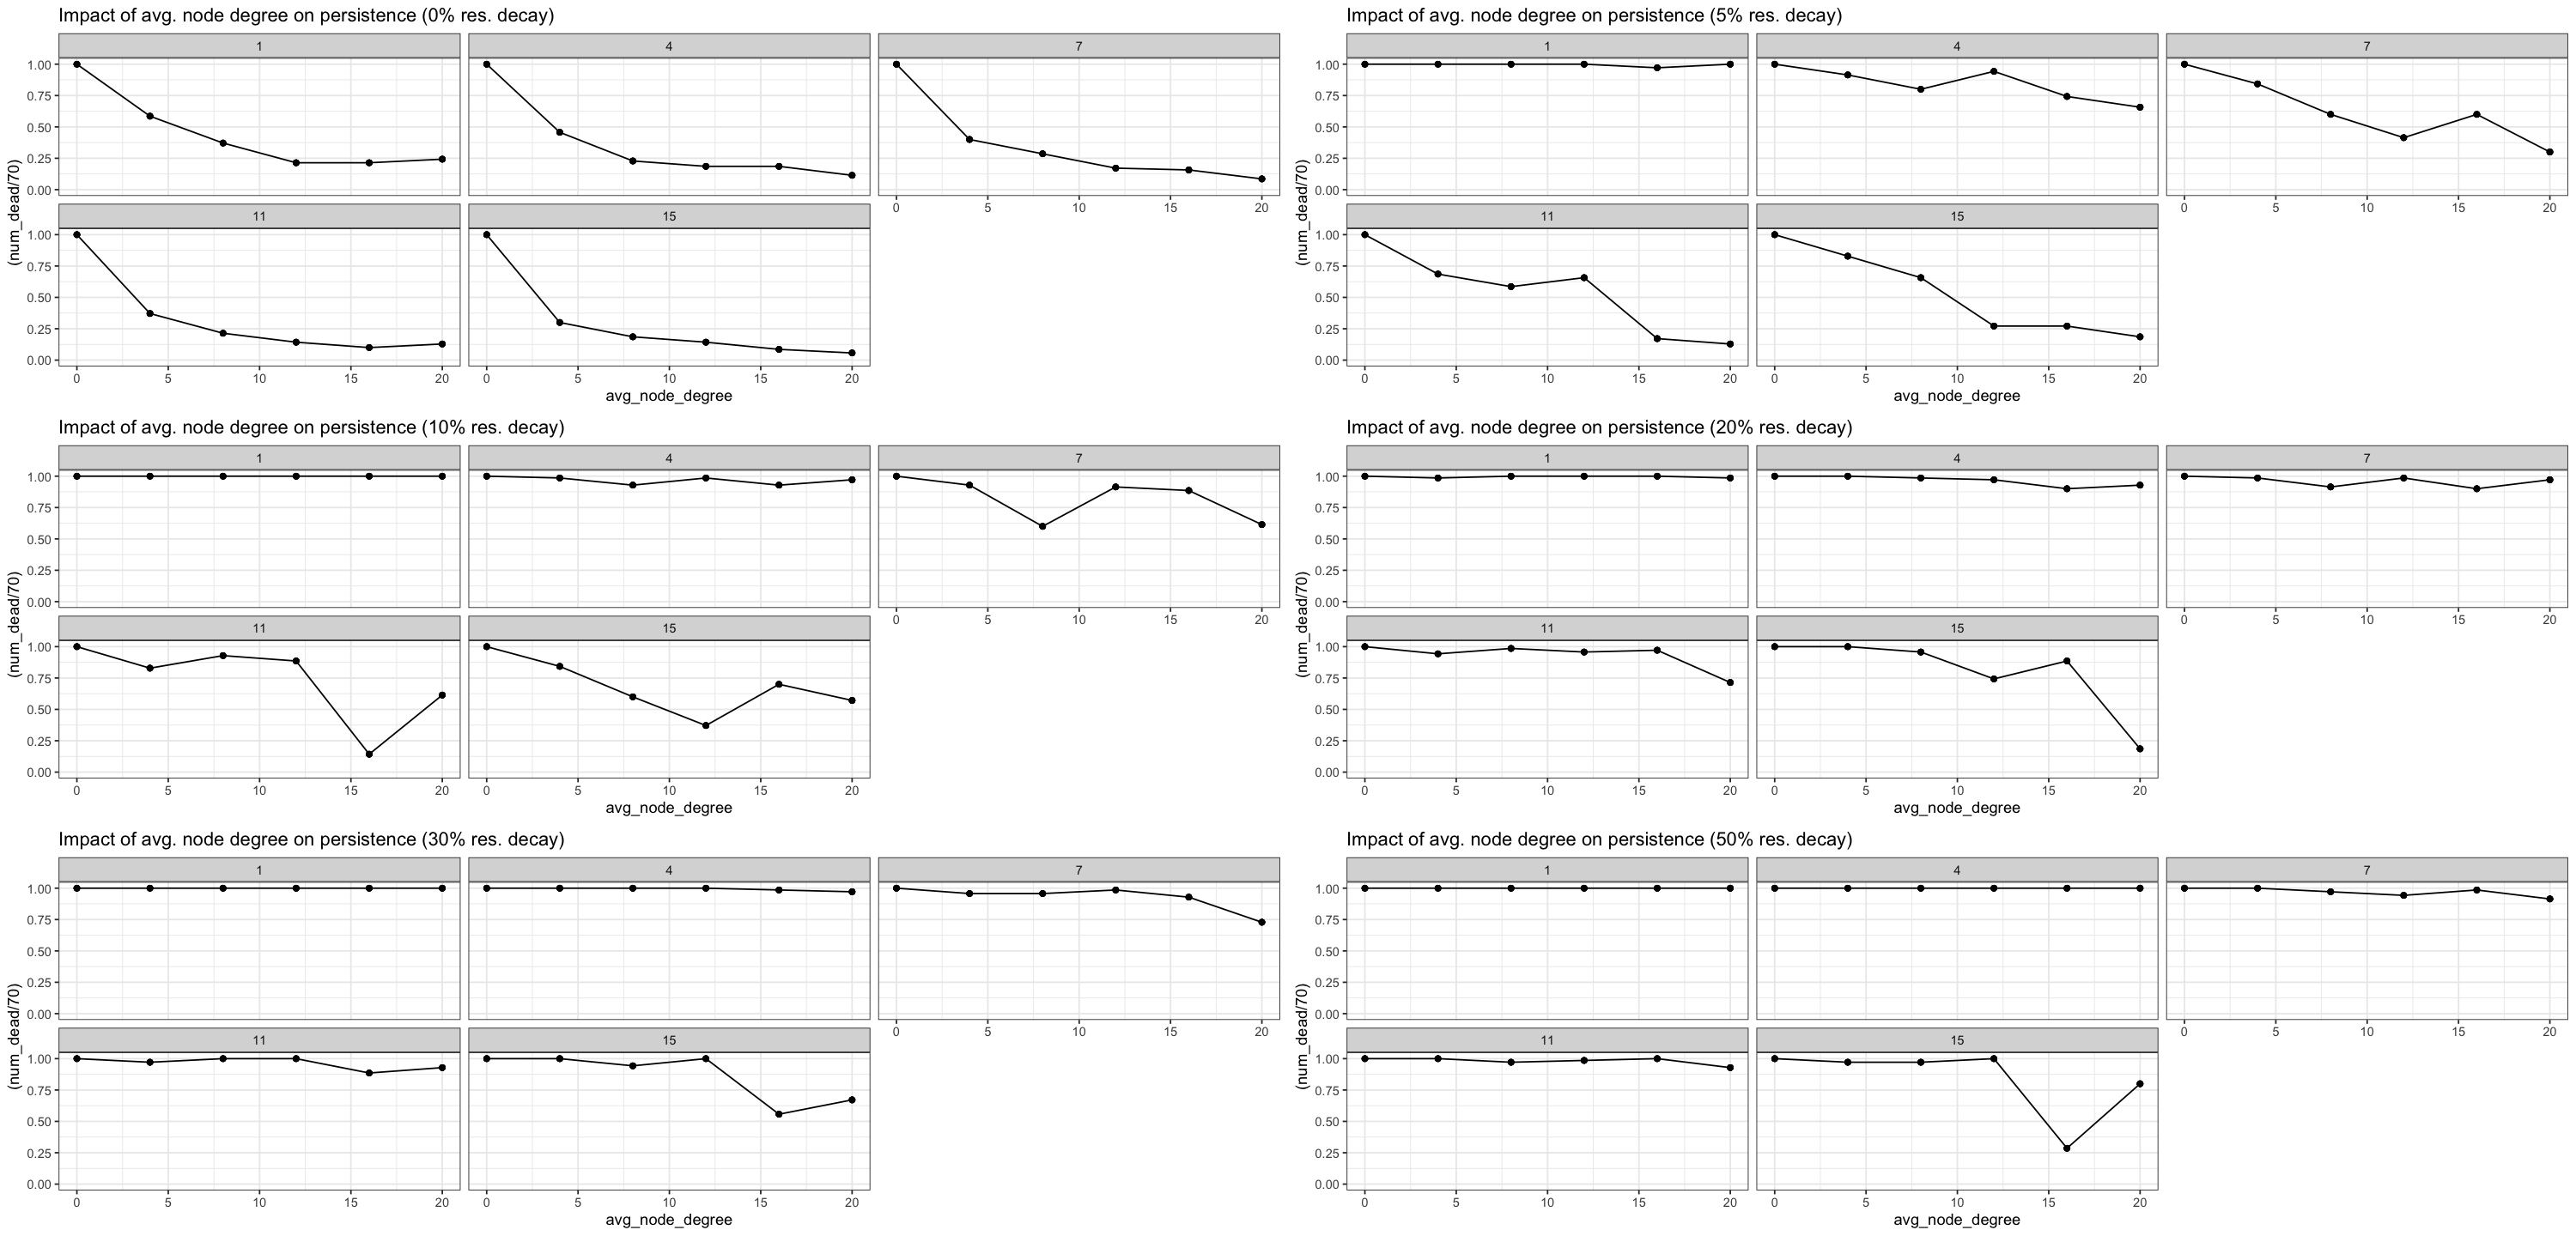

In [124]:
########################################
#Determining the impact of avg. node degree on persistence 

p1 = data_processed %>% filter(res_decay_chance == 0) %>%
  ggplot() +
  geom_point(aes(x=avg_node_degree, y=(num_dead/70))) +
  facet_wrap(vars(num_vectors)) + 
  geom_line(aes(x=avg_node_degree, y=(num_dead/70))) +
  ylim(0,1) +
  ggtitle("Impact of avg. node degree on persistence (0% res. decay)")

p2 = data_processed %>% filter(res_decay_chance == 5) %>%
  ggplot() +
  geom_point(aes(x=avg_node_degree, y=(num_dead/70))) +
  facet_wrap(vars(num_vectors)) + 
  geom_line(aes(x=avg_node_degree, y=(num_dead/70))) +
  ylim(0,1) +
  ggtitle("Impact of avg. node degree on persistence (5% res. decay)")

p3 = data_processed %>% filter(res_decay_chance == 10) %>%
  ggplot() +
  geom_point(aes(x=avg_node_degree, y=(num_dead/70))) +
  facet_wrap(vars(num_vectors)) + 
  geom_line(aes(x=avg_node_degree, y=(num_dead/70))) +
  ylim(0,1) +
  ggtitle("Impact of avg. node degree on persistence (10% res. decay)")

p4 = data_processed %>% filter(res_decay_chance == 20) %>%
  ggplot() +
  geom_point(aes(x=avg_node_degree, y=(num_dead/70))) +
  facet_wrap(vars(num_vectors)) + 
  geom_line(aes(x=avg_node_degree, y=(num_dead/70))) +
  ylim(0,1) +
  ggtitle("Impact of avg. node degree on persistence (20% res. decay)")

p5 = data_processed %>% filter(res_decay_chance == 30) %>%
  ggplot() +
  geom_point(aes(x=avg_node_degree, y=(num_dead/70))) +
  facet_wrap(vars(num_vectors)) + 
  geom_line(aes(x=avg_node_degree, y=(num_dead/70))) +
  ylim(0,1) +
  ggtitle("Impact of avg. node degree on persistence (30% res. decay)")

p6 = data_processed %>% filter(res_decay_chance == 50) %>%
  ggplot() +
  geom_point(aes(x=avg_node_degree, y=(num_dead/70))) +
  facet_wrap(vars(num_vectors)) + 
  geom_line(aes(x=avg_node_degree, y=(num_dead/70))) +
  ylim(0,1) +
  ggtitle("Impact of avg. node degree on persistence (50% res. decay)")
options(repr.plot.height = 12, repr.plot.width =25 )
grid.arrange(p1, p2, p3, p4, p5, p6)

## Linear Regression Model for Impact of resistance decay on persistance

In [121]:
# num_dead.lm <-lm(num_dead ~ num_vectors + avg_node_degree + res_decay_chance, 
#                  data = data_processed)
# summary(num_dead.lm)
num_dead.lm <-lm(num_dead ~ avg_node_degree*res_decay_chance*num_vectors, 
                 data = data_processed)
print(summary(num_dead.lm))


Call:
lm(formula = num_dead ~ avg_node_degree * res_decay_chance * 
    num_vectors, data = data_processed)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.947  -5.900   2.071   7.737  26.753 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                  64.2971602  2.1349819  30.116
avg_node_degree                              -0.9859804  0.1762903  -5.593
res_decay_chance                              0.1257234  0.0759936   1.654
num_vectors                                  -0.3194853  0.2351964  -1.358
avg_node_degree:res_decay_chance              0.0360024  0.0062750   5.737
avg_node_degree:num_vectors                  -0.1206237  0.0194207  -6.211
res_decay_chance:num_vectors                  0.0175769  0.0083717   2.100
avg_node_degree:res_decay_chance:num_vectors  0.0002414  0.0006913   0.349
                                             Pr(>|t|)    
(Intercept)                                   < 2

**INTERPRETATION**
Only the following were significant witht he following coefficients (and standard error):
- avg_node_degree : -0.99 (.17) w/ p-value 3e-08
    - With 1 decrease in average node degree, the # of deaths approximately decreases by 1, assuming the number of vectors and resistance decay chance remain constant.
- res_decay_chance : 0.13 (.075) w/ p-value 0.098
    - With 1 increase in resistance decay chance, the # of deaths approximately increases by 0.13, assuming the number of vectors and average node degree remain constant. Notably, given the weak p-value, this finding would need to be further cemented with more results.
- avg_node_degree:res_decay_chance : 0.036 (0.0063) w/ p-value 1.26-08
    - The significance of this term indicates that the impact of the average node degree and resistance decay chance on the proportion dead are dependent on one another. Indeed, we can see that as the resistance decay chance increases, the positive influence of the average node degree in decreasing the proportion dead becomes less strong.
- avg_node_degree:num_vectors : -0.12 (0.019) w/ p-value 8e-10
    - The significance of this term indicates that the impact of the average node degree and number of vectors on the proportion dead are dependent on one another. This phenomenon might be best observed at 5% & 10% resistence decay where at an average node degree of 12, the proportion dead reaches a maximum at 11 vectors while it reaches a minimum for an average node degree of 16. More results would be required to fully characterize this interaciton.
- res_decay_chance:num_vectors : 0.018 (0.008) w/ p-value 0.036
    - The significance of this term indicates that the impact of the resistance decay chance and number of vectors on the proportion dead are dependent on one another. Indeed, our results indicate a larger influence of the number of vectors in for 5 & 10% resistance decay.
    
    Interestingly, all replicates got identical results for the number dead, indicating that the stochasticty of the movement of the vectors does not play a significant role in the results given our paraemter sets.



## Possible dataframe manipulation for graphing

In [123]:
# get the values to use for dataframe for anova
fixing <- dcast(data_processed, sim ~ res_decay_chance, value.var="num_dead", fun.aggregate=mean)
fixing <- fixing[,c("0","5","10","20","30","40","50")]
dim(fixing)
non_na_res_decay <- data.frame("0" = na.omit(fixing["0"]), 
                              "5" = na.omit(fixing["5"]), 
                              "10" = na.omit(fixing["10"]), 
                              "20" = na.omit(fixing["20"]), 
                              "30" = na.omit(fixing["30"]), 
                              "40" = na.omit(fixing["40"]), 
                              "50" = na.omit(fixing["50"]))
 

[1] 1050    7

In [125]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Users/hopekirby/miniconda3/envs/Rjupyter/lib/libblas.3.9.0.dylib
LAPACK: /Users/hopekirby/miniconda3/envs/Rjupyter/lib/liblapack.3.9.0.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] reshape2_1.4.4 gridExtra_2.3  dplyr_1.1.1    ggplot2_3.4.2 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.10      plyr_1.8.8       pillar_1.9.0     compiler_4.1.2  
 [5] base64enc_0.1-3  tools_4.1.2      digest_0.6.31    uuid_1.1-0      
 [9] jsonlite_1.8.4   evaluate_0.20    lifecycle_1.0.3  tibble_3.2.1    
[13] gtable_0.3.3     pkgconfig_2.0.3  rlang_1.1.0      IRdisplay_1.1   
[17] cli_3.6.1        IRkernel_1.3.2   fastmap_1.1.1    stringr_1.5.0   
[21] repr_1.1.6       withr_